# Projectile launch: angles to hit a target
This code ilustrates two-dimensional particle kinematics by studying classical projectile launch.

By:
**Juan A. Ramírez Macías**  
*Mech. Eng. Professor*  
*Universidad Pontificia Bolivariana*

![ProjectileTwoAngles](./img/projectileLaunchVelocity.png)

## Modules import

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem's inputs
The inputs to the problem are
- Initial launch velocity: $v_0$
- Target horizontal distance: $d_x$
- Target vertical distance: $d_y$
- Acceleration due to gravity: $g$

In [2]:
# Launch angle 1
theta1_deg = 4.
theta1 = theta1_deg * np.pi / 180.
# Launch angle 2
theta2_deg = 8.
theta2 = theta2_deg * np.pi / 180.
# Launch height
h = 2.6
# Distance to serve line
L = 18.4 # m
# Distance to the net
Ln = 12.0 # m
# Ball diameter
d = 0.07 # m
# Net height
hn = 0.9
# Gravity acceleration
g = 9.8 # m/s^2

## Solution to the problem
In the problem $x$-direction is positive right and $y$-direction is positive up.

![ProjectileTwoAngles](./img/projectileLaunchVelocity.png)

The projectile is lauched at a speed $v_0$ and angle $\theta$ with respect to the horizontal. In this case, the trajectory described by the projectile as a function of time is given by
- $x(t) = x_0 + v_0 \cos(\theta) t$
- $y(t) = y_0 - v_0 \sin(\theta) t - \frac{1}{2} g t ^ 2.$

Let us make the following assumptions:
- The projectile is lauched from $x_0 = 0$ and $y_0 = h$.
- We want to hit a target that is located at coordinates $x = L$ and $y = 0$.

We can write from the $x$ equation that
$$t = \frac{L}{v_0 \cos (\theta)},$$
which is the time to hit the target.

This can be replaced into the $y$ equation, and the result is
$$0 = h - v_0 \sin(\theta) \left( \frac{L}{v_0 \cos (\theta)} \right) - \frac{1}{2} g \left( \frac{L}{v_0 \cos (\theta)} \right)^ 2.$$
Rearranging we get
$$0 = h - L \tan(\theta) - \frac{1}{2} g \frac{L^2}{v_0^2 \cos^2 (\theta)}.$$
This is an equation we need to solve for $v_0$.

Solving for $v_0$ we get
$$
v_0 = L \sqrt{\frac{g}{2 \cos^2(\theta) \left(h - L \tan( \theta) \right)}}
$$


In [3]:
# Coefficients
v01 = L * np.sqrt(g / (2. * np.cos(theta1) ** 2 * (h - L * np.tan(theta1))))
v02 = L * np.sqrt(g / (2. * np.cos(theta2) ** 2 * (h - L * np.tan(theta2))))

print "Launch velocity 1:", v01, "m/s ,", v01 * 3.6, "km/h"
print "Launch velocity 2:", v02, "m/s ,", v02 * 3.6, "km/h"

Launch velocity 1: 35.6275030679 m/s , 128.259011044 km/h
Launch velocity 2: 347.013142255 m/s , 1249.24731212 km/h


## Height at the net
At this point we know the launch velocity $v_0$ and the horizontal distance to the net $L_n$

Then, we can write from the $x$ equation that
$$t_n = \frac{L_n}{v_0 \cos (\theta)},$$
which is the time to reach the net.

This can be replaced into the $y$ equation, and the result is
$$y_n = h - v_0 \sin(\theta) \left( \frac{L_n}{v_0 \cos (\theta)} \right) - \frac{1}{2} g \left( \frac{L_n}{v_0 \cos (\theta)} \right)^ 2.$$
Rearranging we get
$$y_n = h - L_n \tan(\theta) - \frac{1}{2} g \frac{L_n^2}{v_0^2 \cos^2 (\theta)}.$$
This is an equation we need to solve for $v_0$.

In [4]:
yn1 = h - Ln * np.tan(theta1) - 0.5 * g * Ln ** 2 / v01 ** 2 / np.cos(theta1) ** 2
yn2 = h - Ln * np.tan(theta2) - 0.5 * g * Ln ** 2 / v02 ** 2 / np.cos(theta2) ** 2

print "Net height 1:", yn1, "m"
print "Net clearance 1:", yn1 - hn - d / 2., "m"

print "Net height 2:", yn2, "m"
print "Net clearance 2:", yn2 - hn - d / 2., "m"

Net height 1: 1.20227145412 m
Net clearance 1: 0.267271454119 m
Net height 2: 0.907534663473 m
Net clearance 2: -0.0274653365272 m


## Trajectories computation
To check if the computation was good, we plot the trajectories for the two angles:
- $x(t) = v_0 \cos(\theta) t$
- $y(t) = h - v_0 \sin(\theta) t - \frac{1}{2} g t ^ 2.$

First angle:

In [5]:
# Time to hit target
t1_hit = L / v01 / np.cos(theta1)
dt = 0.01
print "Launch time 1:", t1_hit, "s"
# Time array in seconds
t1 = np.arange(0., t1_hit + dt, dt)
# Position in meters
x1 = v01 * np.cos(theta1) * t1
y1 = h - v01 * np.sin(theta1) * t1 - 0.5 * g * t1 ** 2 
# Velocity in m/s
Vx1 = v01 * np.cos(theta1) * np.ones_like(t1)
Vy1 = -v01 * np.sin(theta1) - g * t1

Launch time 1: 0.517716071473 s


Second angle:

In [6]:
# Time to hit target
t2_hit = L / v02 / np.cos(theta2)
print "Launch time 2:", t2_hit, "s"
# Time array in seconds
t2 = np.arange(0., t2_hit + dt, dt)
# Position in meters
x2 = v02 * np.cos(theta2) * t2
y2 = h - v02 * np.sin(theta2) * t2 - 0.5 * g * t2 ** 2 
# Velocity in m/s
Vx2 = v02 * np.cos(theta2) * np.ones_like(t2)
Vy2 = -v02 * np.sin(theta2) - g * t2

Launch time 2: 0.0535450248761 s


## Trajectories plot

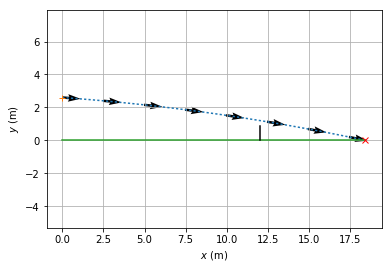

In [7]:
plt.figure()
# Trajectories plot
plt.plot(x1, y1, ':')
# Interesting points plot
# Floor
plt.plot([0., 18.4],[0., 0.], 'C2')
# Racket hit point
plt.plot(x1[0], y1[0], '+')
# Floor hit point
plt.plot(L, 0, 'xr')
# Net
plt.plot([12., 12.],[0., .9], 'k')
# Velocity field plot
Nd = 7
plt.quiver(x1[::Nd], y1[::Nd], Vx1[::Nd], Vy1[::Nd])
# Axes settings
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.axis('equal')
plt.grid()
plt.show()

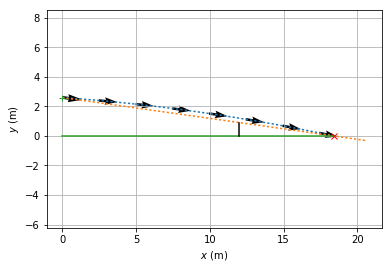

In [8]:
plt.figure()
# Trajectories plot
plt.plot(x1, y1, ':')
plt.plot(x2, y2, ':')
# Interesting points plot
# Floor
plt.plot([0., 18.4],[0., 0.], 'C2')
# Racket hit point
plt.plot(x1[0], y1[0], '+')
# Floor hit point
plt.plot(L, 0, 'xr')
# Net
plt.plot([12., 12.],[0., .9], 'k')
# Velocity field plot
Nd = 7
plt.quiver(x1[::Nd], y1[::Nd], Vx1[::Nd], Vy1[::Nd])
plt.quiver(x2[::Nd], y2[::Nd], Vx2[::Nd], Vy2[::Nd])
# Axes settings
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.axis('equal')
plt.grid()
plt.show()
